In [4]:
#  An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their
#  website and browse for courses. 
# The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for
# the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also 
# gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads
# get converted while most do not. The typical lead conversion rate at X education is around 30%. 
# Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.
#  To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead
#  conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 
# X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build
# a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower
#  lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%



Goals of the Case Study

In [5]:
# There are quite a few goals for this case study:

# Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would
# mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
# There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle
# these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include 
# this in your final PPT where you'll make recommendations.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [7]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)

In [8]:
data = pd.read_csv(r'C:\Users\dhima\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# target  column i.e dependent column  : "Converted"


In [10]:
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [11]:
# splitting columns into cat and num type
Category_col=[i for i in data.columns if data[i].dtype=="O"]

In [12]:
numerical_col=[i for i in data.columns if data[i].dtype!="O"]

In [13]:
Category_col

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [ ]:
# checking unique for category data

In [14]:
print(data.shape)
for i in data.columns:
    if i in Category_col:
        print(i,'have unique values', data[i].nunique())
#looking category of 

(9240, 37)
Prospect ID have unique values 9240
Lead Origin have unique values 5
Lead Source have unique values 21
Do Not Email have unique values 2
Do Not Call have unique values 2
Last Activity have unique values 17
Country have unique values 38
Specialization have unique values 19
How did you hear about X Education have unique values 10
What is your current occupation have unique values 6
What matters most to you in choosing a course have unique values 3
Search have unique values 2
Magazine have unique values 1
Newspaper Article have unique values 2
X Education Forums have unique values 2
Newspaper have unique values 2
Digital Advertisement have unique values 2
Through Recommendations have unique values 2
Receive More Updates About Our Courses have unique values 1
Tags have unique values 26
Lead Quality have unique values 5
Update me on Supply Chain Content have unique values 1
Get updates on DM Content have unique values 1
Lead Profile have unique values 6
City have unique values 7


In [ ]:
# numerical data check

In [15]:
data[numerical_col].describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
# column TotalVisits,Total Time Spent on Website, might have some outliers

In [16]:
[print(i,data[i].isna().sum())for i in data.columns if data[i].isna().sum()>0]

Lead Source 36
TotalVisits 137
Page Views Per Visit 137
Last Activity 103
Country 2461
Specialization 1438
How did you hear about X Education 2207
What is your current occupation 2690
What matters most to you in choosing a course 2709
Tags 3353
Lead Quality 4767
Lead Profile 2709
City 1420
Asymmetrique Activity Index 4218
Asymmetrique Profile Index 4218
Asymmetrique Activity Score 4218
Asymmetrique Profile Score 4218


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
# converting all category missing data into new data type missing i.e. new class missing for nulls

In [17]:
for i in Category_col:
    if data[i].isnull().sum()>0:
        data[i].fillna('Missing',inplace=True)

In [18]:
data[Category_col].isna().sum()

Prospect ID                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Tags                           

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [20]:
data[numerical_col].isnull().sum()

Lead Number                       0
Converted                         0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Asymmetrique Activity Score    4218
Asymmetrique Profile Score     4218
dtype: int64

In [21]:
data[numerical_col]

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0,0,0.00,15.0,15.0
1,660728,0,5.0,674,2.50,15.0,15.0
2,660727,1,2.0,1532,2.00,14.0,20.0
3,660719,0,1.0,305,1.00,13.0,17.0
4,660681,1,2.0,1428,1.00,15.0,18.0
...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,15.0,17.0
9236,579546,0,2.0,238,2.00,14.0,19.0
9237,579545,0,2.0,199,2.00,13.0,20.0
9238,579538,1,3.0,499,3.00,15.0,16.0


In [22]:
data[numerical_col].describe(percentiles=[.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [45]:
# missing values in  columns 
'TotalVisits'
'Total Time Spent on Website'
'Page Views Per Visit'
'Asymmetrique Activity Score'
'Asymmetrique Profile Score'

'Asymmetrique Profile Score'

Cheking for outliers before imputing data

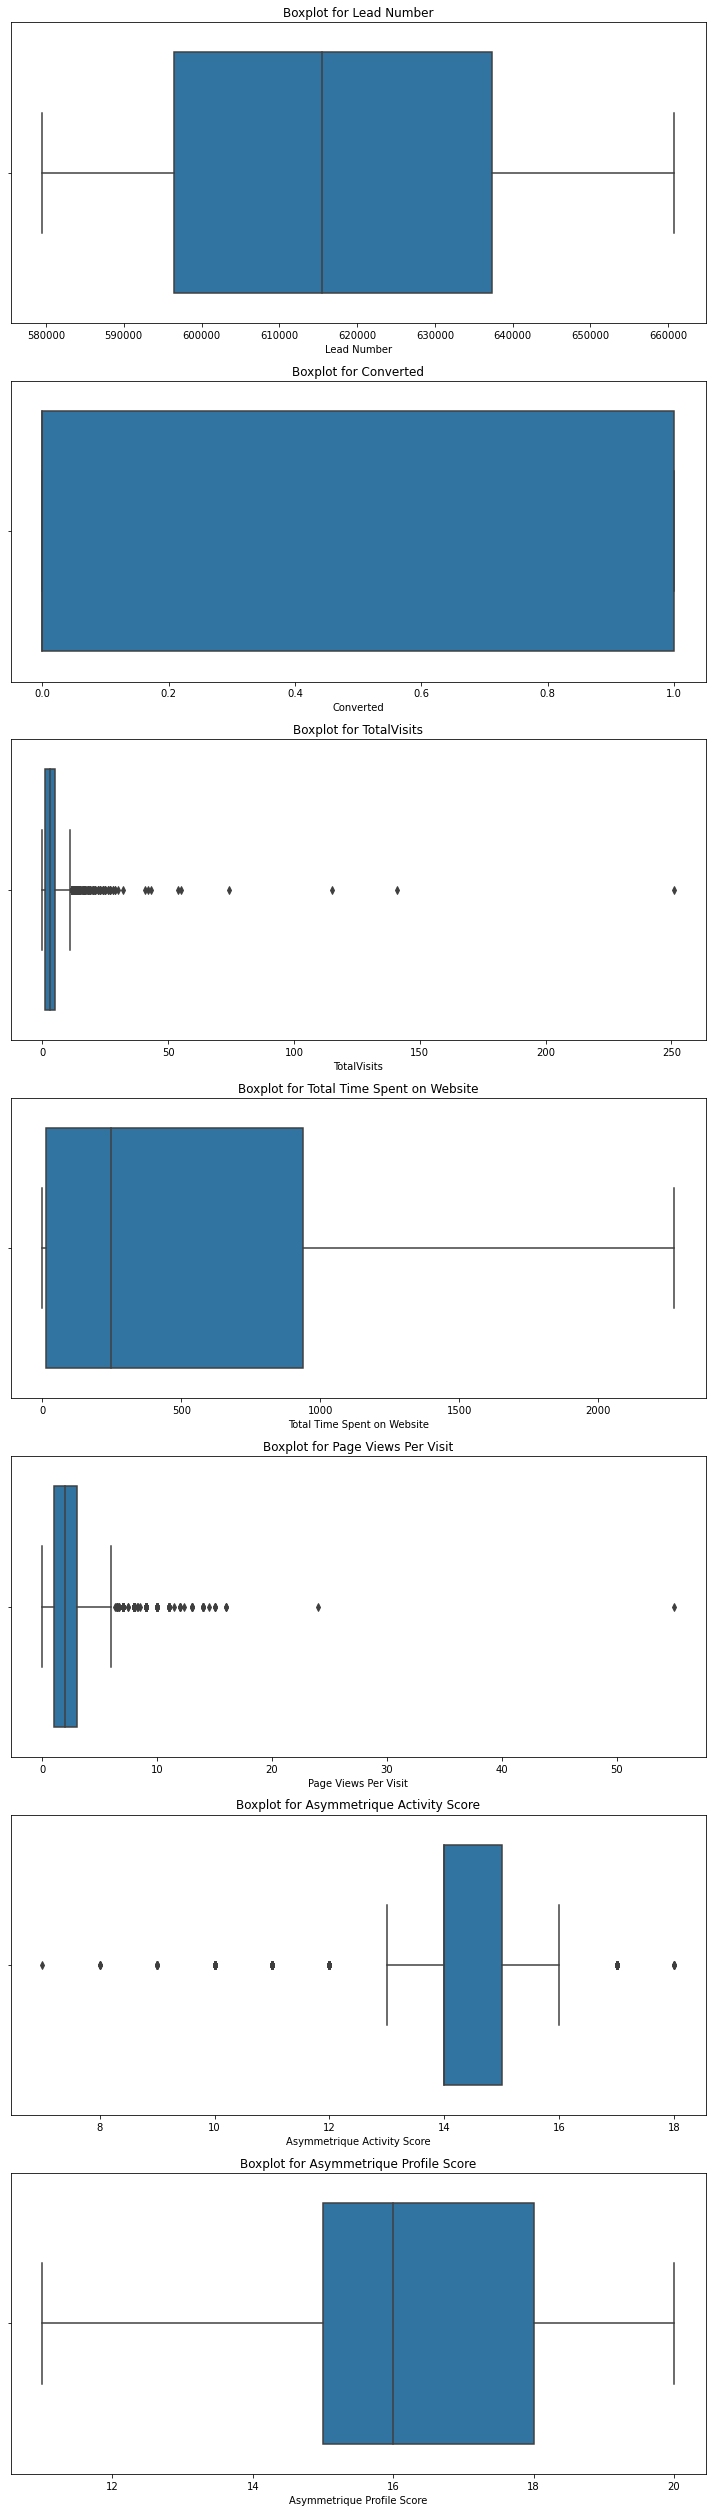

In [23]:


# Create subplots
fig, axes = plt.subplots(nrows=len(numerical_col), figsize=(10, 5 * len(numerical_col)))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_col):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Columns 'TotakVisits', 'page views per visit', 

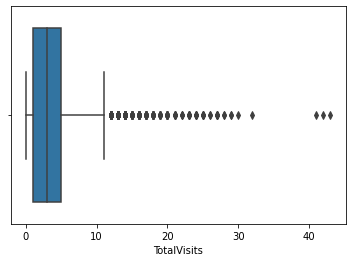

In [76]:
cap_totalvisit=data[data['TotalVisits']<50]['TotalVisits']
sns.boxplot(x=cap_totalvisit);

In [74]:
print(data[data['TotalVisits']>30]['TotalVisits'].count())
print('value greter than 30 correcpond to ',(10/data.shape[0]*100),'%')

10
value greter than 30 correcpond to  0.10822510822510822 %


In [122]:
# as total visit greter than 30 is only 0.1 % 
# ans filling missing values with median
data['TotalVisits']=data['TotalVisits'].fillna(data['TotalVisits'].median())

In [77]:
numerical_col

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

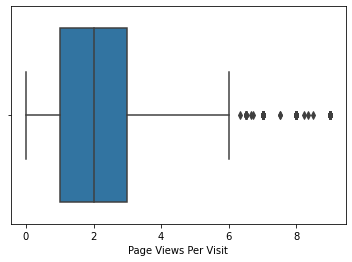

In [121]:
cap_pagesviewed=data[data['Page Views Per Visit']<10]['Page Views Per Visit']
sns.boxplot(x=cap_pagesviewed);

In [120]:
print(data[data['Page Views Per Visit']>10]['Page Views Per Visit'].count())
print('value greter than 10 correcpond to ',(data[data['Page Views Per Visit']>10]['Page Views Per Visit'].count()/data.shape[0])*100,'%')

50
value greter than 10 correcpond to  0.5411255411255411 %


In [123]:
# as values appears to be outlier but it might be possible that a person browsed
# a lot of courses so not a outlier
# imputing missing values
data['Page Views Per Visit']=data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [136]:
[print(i,data[i].isna().sum())for i in data.columns if data[i].isna().sum()>0]
[print(i,data[i].isna().sum()/data.shape[0])for i in data.columns if data[i].isna().sum()>0]

Asymmetrique Activity Score 4218
Asymmetrique Profile Score 4218
Asymmetrique Activity Score 0.4564935064935065
Asymmetrique Profile Score 0.4564935064935065


[None, None]

In [129]:
# missing data in Asymmetrique Activity Score

<AxesSubplot:xlabel='Asymmetrique Activity Score', ylabel='Asymmetrique Activity Index'>

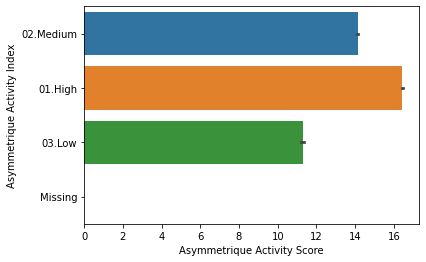

In [128]:
sns.barplot(x=data['Asymmetrique Activity Score'],y=data['Asymmetrique Activity Index'])

In [134]:
data[data['Asymmetrique Activity Score'].isna()].head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
963,59718980-d656-4415-baeb-c223ed6abe3a,649981,API,Organic Search,No,No,0,11.0,1166,2.20,Page Visited on Website,India,Missing,Missing,Missing,Missing,No,No,No,No,No,No,No,No,Missing,Missing,No,No,Missing,Missing,Missing,Missing,NaN,NaN,No,No,Page Visited on Website
1363,a8a1c41c-a21e-43bb-9120-444d79efff06,645610,API,Direct Traffic,No,No,0,4.0,446,1.33,Email Opened,India,Missing,Missing,Missing,Missing,No,No,No,No,No,No,No,No,Missing,Missing,No,No,Missing,Missing,Missing,Missing,NaN,NaN,No,No,Email Opened
1388,a69a81be-f69a-45e0-9857-1f75ec740108,645388,API,Google,No,No,1,2.0,2020,2.00,Email Opened,Singapore,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Missing,Missing,No,No,Select,Select,Missing,Missing,NaN,NaN,No,No,Email Opened
1401,4e5cae69-5632-4db3-af8f-7e1b2c9b552e,645333,API,Google,No,No,1,3.0,1459,3.00,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Missing,Missing,No,No,Select,Select,Missing,Missing,NaN,NaN,No,No,Email Opened
1513,14f31910-89a3-4f38-b803-dbb57999ae44,644225,API,Google,No,No,0,6.0,481,6.00,Email Opened,India,Missing,Missing,Missing,Missing,No,No,No,No,No,No,No,No,Interested in other courses,Missing,No,No,Missing,Missing,Missing,Missing,NaN,NaN,No,No,Modified
